 # 🔺 **TRABAJO** **2**, Procesamiento con **PYTHON** 🔺

⚫ **Integrantes**: Lina Beltrán, Jose Jorge Muñoz 

⚫ **Asignatura**: Almacenamiento & Recuperación de la información 

# Configuracion de ***Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#funcionalidades dependientes del sistema operativo
from os import listdir
from os.path import isfile, join

Mounted at /content/gdrive


# Cargar Paquetes, Funciones

In [ ]:
#imprimit listas grandes
import pprint
from pprint import pprint

In [ ]:
#Cargar Librerias
#import join
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt
import sklearn

Carga de Paquetes

In [ ]:
# corpus de nltk para 'tokenizer', 'stopwords' y 'words' (diccionarios)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

Cargar paquetes de Lematizar y Stem

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

StopWords NLTK

In [ ]:
from nltk.corpus import stopwords
 
stop_words_nltk_sp= set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))

179


In [ ]:
from nltk.corpus import words as voc_en

# **Procesamiento con los archivos** ***Múltiples*** ⚡

# Paths

In [ ]:
path_in="/content/gdrive/MyDrive/Trabajo2Jose/dataset/wiki-multiple-files/"
path_out="/content/gdrive/MyDrive/Trabajo2Jose/OutPython/"

In [ ]:
#!ls "/content/gdrive/MyDrive/Trabajo2Jose/dataset/single/wiki-single-file.txt"

# Carga de Docs Txt como ***Lista***

In [ ]:
DF_Files = [f for f in listdir(path_in) if isfile(join(path_in, f))]
print(DF_Files)

['712.txt', '2478.txt', '918.txt', '1778.txt', '3871.txt', '935.txt', '680.txt', '3212.txt', '1809.txt', '3009.txt', '1761.txt', '2745.txt', '3669.txt', '3231.txt', '1443.txt', '3513.txt', '953.txt', '1243.txt', '3766.txt', '4051.txt', '465.txt', '1289.txt', '1847.txt', '1802.txt', '2790.txt', '3946.txt', '1208.txt', '831.txt', '2095.txt', '4042.txt', '3991.txt', '1602.txt', '2181.txt', '3385.txt', '947.txt', '3579.txt', '1666.txt', '3215.txt', '2803.txt', '1968.txt', '357.txt', '1260.txt', '4347.txt', '3428.txt', '1325.txt', '128.txt', '2952.txt', '954.txt', '1168.txt', '3012.txt', '1460.txt', '1290.txt', '235.txt', '840.txt', '1232.txt', '2301.txt', '1852.txt', '2159.txt', '2498.txt', '3182.txt', '3483.txt', '3927.txt', '379.txt', '4129.txt', '570.txt', '3665.txt', '3537.txt', '2384.txt', '2967.txt', '3901.txt', '2935.txt', '2843.txt', '29.txt', '2785.txt', '2286.txt', '300.txt', '3776.txt', '4104.txt', '2575.txt', '265.txt', '1275.txt', '4323.txt', '3755.txt', '1123.txt', '4001.txt'

In [ ]:
len(DF_Files)

4396

# Tokenizar y Optimizar cada documento

**Cargar** Docs **Sucios**, **Tokenizar** con **NLTK** y **Optimización**

In [ ]:

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

for doc in DF_Files:
  input_file = open(path_in+doc, "r")
  output_file_clean = open(path_out+"clean_"+doc,"w")
  for line in input_file:
      line_clean = ""
      tokens = nltk.word_tokenize(line)
      tokens_alphanum = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
      tokens_mayor_a_una_cifra = [w.lower() for w in tokens_alphanum if len(w)>1]
      tokens_alfabeto = [w for w in tokens_mayor_a_una_cifra if w.isalpha()]
      tokens_stopwords = [w for w in tokens_alfabeto if w not in stop_words_nltk_en]
      #tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens]
      tokens_lematizar = [wordnet_lemmatizer.lemmatize(w) for w in tokens_stopwords]

      #tokens = [porter.stem(w) for w in tokens]
      #tokens = [lancaster.stem(w) for w in tokens]
      
      for w in tokens_lematizar:
          line_clean=line_clean+w+" "
              
      if (line_clean!=""):
          line_clean=line_clean+"\n"
          output_file_clean.write(line_clean)
  output_file_clean.close()        

# Cargar Documentos ***Limpios*** 

In [ ]:
corpus=[]

for doc in DF_Files:
  input_file_clean = open(path_out+"clean_"+doc, "r", encoding='iso-8859-1')
  corpus.append(input_file_clean.read())

In [ ]:
len(corpus)

4396

# **Text Mining ⚡**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
X.toarray()
vectorizer.get_feature_names_out()
pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

,aa,aaa,aaberg,aaboe,aabozkr,aachen,aachener,aacp,aad,aadmi,...,zygma,zygmunt,zymovyi,zynga,zytron,zz,zzettin,zzraky,zzuleni,zzzap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4394,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF**

In [ ]:
tfidf = TfidfVectorizer(min_df=1, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(corpus)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names()
)

# **Procesamiento con el doc que contiene todos los archivos .txt** ⚡

# Paths

In [ ]:
path_in_single="/content/gdrive/MyDrive/Trabajo2Jose/dataset/single/"
path_out_single="/content/gdrive/MyDrive/Trabajo2Jose/Out_single_doc/"

# *Tokenizar y Optimizar paso por paso*

Nombrar librerias y cargar documento sucio

In [ ]:
lancaster1 = LancasterStemmer()
wordnet_lemmatizer1 = WordNetLemmatizer()
input_file_single = open(path_in_single+"wiki-single-file.txt", "r")

***Tokenizar***

In [ ]:
read = input_file_single.read()
BoW_Tokenizar = nltk.word_tokenize(read)

Conviertimos la lista del *BoW* actual en un String y *Guardamos el BoW* convertido en *String* como **.txt** en la carpeta Out_single_doc

In [ ]:
string=" ".join([str(item) for item in BoW_Tokenizar])
with open(path_out_single+"single_clean.txt", "w") as Write_BoW_Tokenizar:
    Write_BoW_Tokenizar.write(string)

numero de palabras finales =  141209
[(',', 107034), ('@', 104538), ('the', 100464), ("'", 78565), ('.', 78549), ('of', 58787), ('and', 48507), ('in', 41579), ('to', 33571), ('a', 33354), ('#', 31675), ('(', 27456), (')', 27437), ('*', 20587), ('was', 19538), ('The', 18226), ('is', 16520), ('for', 13457), ('as', 12629), ('on', 12363)]


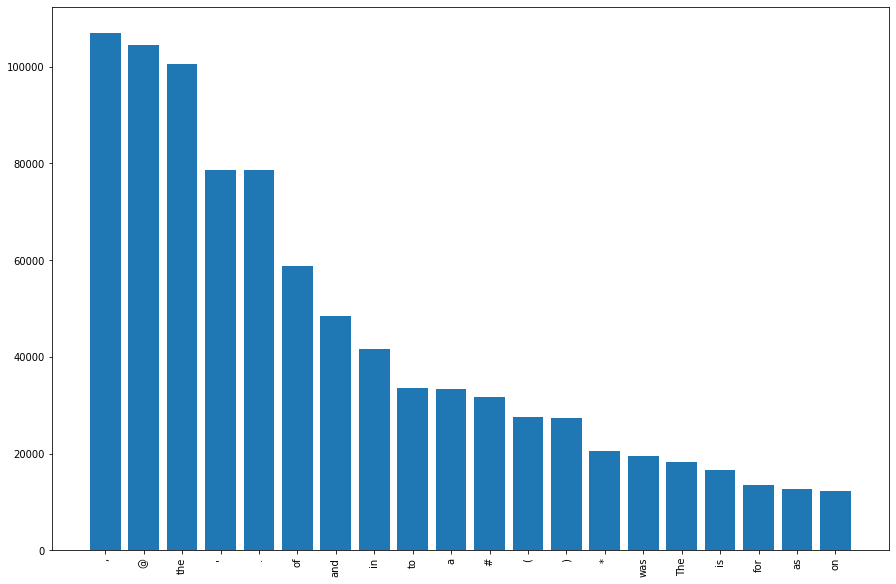

In [ ]:
fdist = nltk.FreqDist(BoW_Tokenizar)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

**Nota:** se guardarán como docs .txt los resultados de cada paso de optimización en la carpeta de ***Out_single_doc*** para visualizar de mejor manera el paso a paso del **BoW**

***Tokens Mayor a una cifra y en minúsculas***

In [ ]:
BoW_una_cifra = [w.lower() for w in BoW_Tokenizar if len(w)>1]

Convertimos la lista del *BoW* actual en un String y *Guardamos el BoW* convertido en *String* como **.txt** en la carpeta Out_single_doc

In [ ]:
string_una_cifra=" ".join([str(item) for item in BoW_una_cifra])
with open(path_out_single+"single_clean_una_cifra.txt", "w") as Write_BoW_unaCifra:
    Write_BoW_unaCifra.write(string_una_cifra)

numero de palabras finales =  126195
[('the', 118711), ('of', 59004), ('and', 48701), ('in', 47395), ('to', 33870), ('was', 19576), ('is', 16634), ('for', 14150), ('on', 13774), ('as', 13559), ('by', 12459), ('with', 12102), ("'s", 10083), ('he', 9987), ('that', 9649), ('at', 9230), ('from', 8864), ('it', 8312), ('his', 8258), ('an', 6531)]


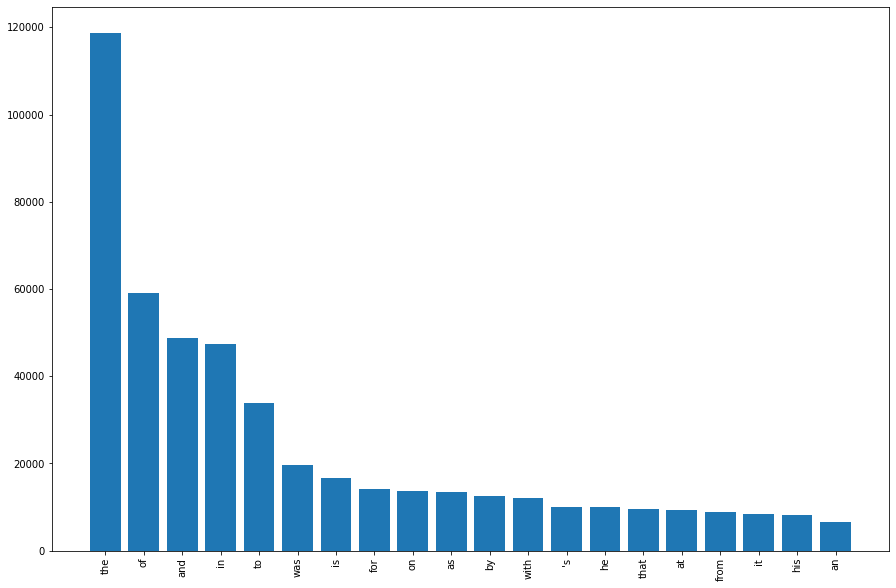

In [ ]:
fdist = nltk.FreqDist(BoW_una_cifra)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

***Caracteres Alfabéticos***

In [ ]:
BoW_alfabeto = [w for w in BoW_una_cifra if w.isalpha()]

Convertimos la lista del *BoW* actual en un String y *Guardamos el BoW* convertido en *String* como **.txt** en la carpeta Out_single_doc

In [ ]:
string_una_alfabeto=" ".join([str(item) for item in BoW_alfabeto])
with open(path_out_single+"single_clean_una_alpfabeto.txt", "w") as Write_BoW_afabeto:
    Write_BoW_afabeto.write(string_una_alfabeto)

numero de palabras finales =  87602
[('the', 118711), ('of', 59004), ('and', 48701), ('in', 47395), ('to', 33870), ('was', 19576), ('is', 16634), ('for', 14150), ('on', 13774), ('as', 13559), ('by', 12459), ('with', 12102), ('he', 9987), ('that', 9649), ('at', 9230), ('from', 8864), ('it', 8312), ('his', 8258), ('an', 6531), ('were', 5221)]


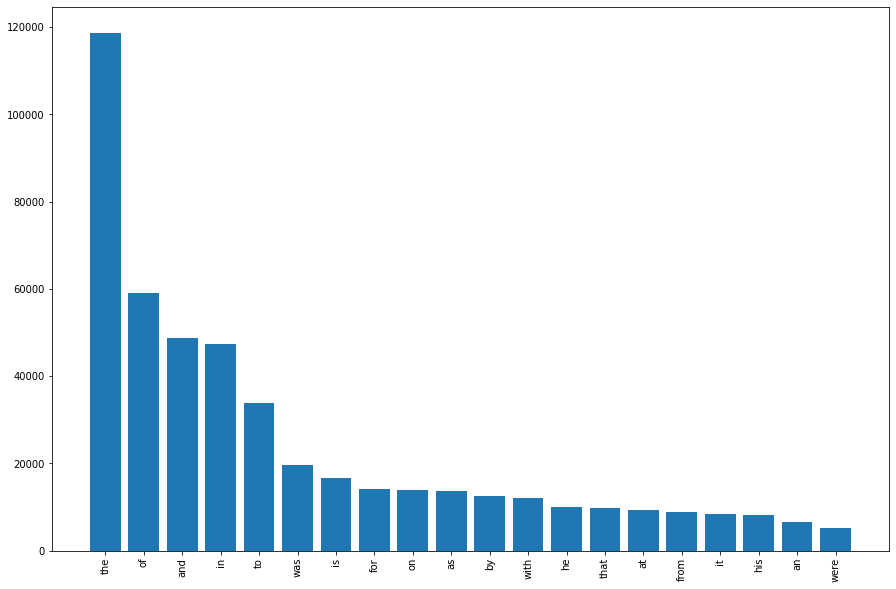

In [ ]:
fdist = nltk.FreqDist(BoW_alfabeto)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

***Remoción de StopsWords***

In [ ]:
BoW_sin_StopsWprds = [w for w in BoW_alfabeto if w not in stop_words_nltk_en]

Convertimos la lista del *BoW* actual en un String y *Guardamos el BoW* convertido en *String* como **.txt** en la carpeta **Out_single_doc**

In [ ]:
string_StopWords=" ".join([str(item) for item in BoW_sin_StopsWprds])
with open(path_out_single+"single_clean_Sin_StopWords.txt", "w") as Write_BoW_StopWords:
    Write_BoW_StopWords.write(string_StopWords)

numero de palabras finales =  87472
[('also', 4318), ('first', 3947), ('new', 3572), ('one', 3470), ('two', 2619), ('amp', 2592), ('time', 2274), ('may', 1779), ('born', 1756), ('years', 1728), ('school', 1654), ('national', 1638), ('would', 1607), ('city', 1581), ('world', 1569), ('de', 1567), ('state', 1566), ('later', 1523), ('season', 1519), ('used', 1506)]


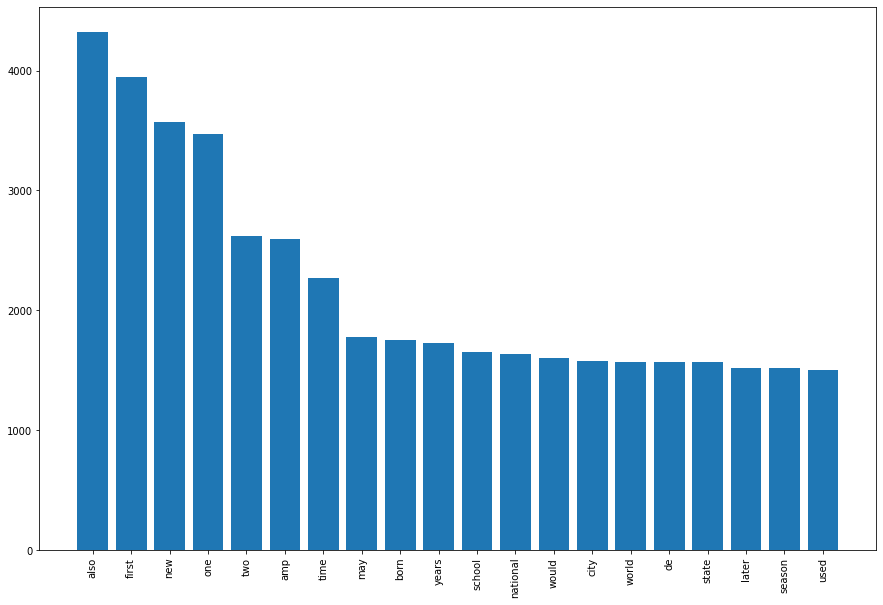

In [ ]:
fdist = nltk.FreqDist(BoW_sin_StopsWprds)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

***Lematizar***

In [ ]:
BoW_lematizar = [wordnet_lemmatizer1.lemmatize(w) for w in BoW_sin_StopsWprds]

Convertimos la lista del *BoW* actual en un String y *Guardamos el BoW* convertido en *String* como **.txt** en la carpeta **Out_single_doc**

In [ ]:
string_Lematizar=" ".join([str(item) for item in BoW_lematizar])
with open(path_out_single+"single_clean_Lematizar.txt", "w") as Write_BoW_Lematizar:
    Write_BoW_Lematizar.write(string_Lematizar)

numero de palabras finales =  80811
[('also', 4318), ('first', 3949), ('new', 3572), ('one', 3556), ('year', 3185), ('state', 2920), ('time', 2818), ('two', 2620), ('amp', 2596), ('school', 2044), ('may', 1781), ('born', 1756), ('city', 1753), ('team', 1729), ('season', 1715), ('de', 1711), ('national', 1673), ('game', 1671), ('university', 1617), ('world', 1611)]


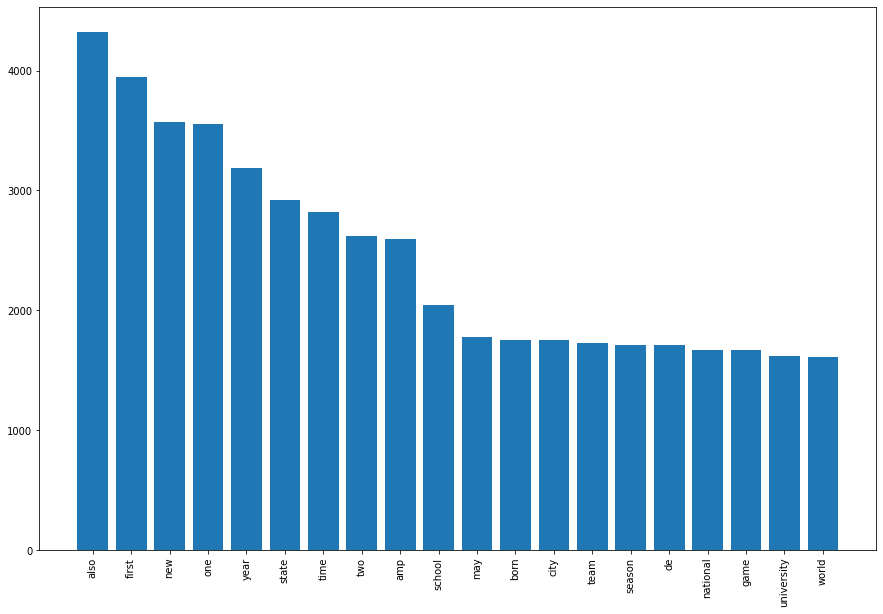

In [ ]:
fdist = nltk.FreqDist(BoW_lematizar)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

***Stemming***

In [ ]:
BoW_stem = [lancaster1.stem(w) for w in BoW_lematizar]

Documento final **optimizado**

In [ ]:
string_Stem=" ".join([str(item) for item in BoW_stem])
with open(path_out_single+"single_clean_Stem.txt", "w") as Write_BoW_Stem:
    Write_BoW_Stem.write(string_Stem)

numero de palabras finales =  58377
[('stat', 4674), ('us', 4578), ('also', 4318), ('new', 3987), ('first', 3967), ('on', 3599), ('year', 3199), ('play', 3187), ('tim', 2926), ('nat', 2895), ('form', 2778), ('includ', 2710), ('two', 2620), ('amp', 2605), ('work', 2377), ('nam', 2304), ('lat', 2236), ('act', 2184), ('serv', 2176), ('fin', 2082)]


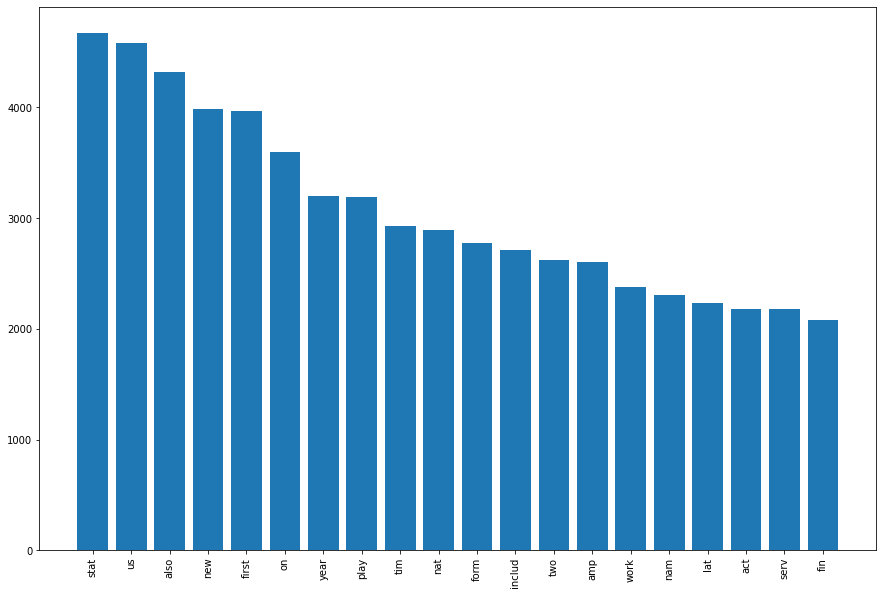

In [ ]:
fdist = nltk.FreqDist(BoW_stem)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer